In [1]:
#1. Import the Libraries
import pandas as pd
import numpy as np
from collections import Counter as c
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



In [2]:
#2. Read the Dataset
df = pd.read_csv('chronickidneydisease.csv')


In [3]:
#3. Analyze the Dataset
# View the first few rows of the dataset
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# View the last few rows of the dataset
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
#To know about the columns present in the dataset
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
#4. Drop Unnecessary Columns
#  Assuming we don't need 'id' for analysis
df = df.drop(columns=['id'],axis=1)


In [8]:
#5. Change the Column Names
#  Example of renaming columns
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [9]:
# Check the data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cell           248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [10]:
# Get the basic statistics
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [12]:
#Rectifying the unknown class "ckd\t"
df['class']=df['class'].replace("ckd\t","ckd")
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [13]:
catcols=set(df.dtypes[df.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cell_count', 'pus_cell_clumps', 'coronary_artery_disease', 'anemia', 'white_blood_cell_count', 'hypertension', 'diabetesmellitus', 'red_blood_cell', 'bacteria', 'appetite', 'class', 'pus_cell', 'pedal_edema', 'packed_cell_volume'}


In [14]:
for i in catcols:
    print("Columns:", i)
    print(c(df[i]))
    print('*'*120+'\n')

Columns: red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 1, '8.0': 1, '3': 1, '2.4': 1, '\t?': 1})
************************************************************************************************************************

Columns: pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
************************************************************************************************************************

Columns: coronary_artery_disease
Counter({'no': 362, 'yes': 34, '\tno': 2, nan: 2})
*******************************************************

In [15]:
# Removing the columns which are not categorical
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)


{'pus_cell_clumps', 'coronary_artery_disease', 'anemia', 'hypertension', 'diabetesmellitus', 'red_blood_cell', 'bacteria', 'appetite', 'class', 'pus_cell', 'pedal_edema'}


In [16]:
# Numerical columns
contcols=set(df.dtypes[df.dtypes!='O'].index.values)
print(contcols)

{'albumin', 'potassium', 'blood_urea', 'hemoglobin', 'blood_pressure', 'specific_gravity', 'sodium', 'serum_creatinine', 'blood_glucose_random', 'sugar', 'age'}


In [17]:
for i in contcols:
    print("Continuos columns:",i)
    print(c(df[i]))
    print('*'*120+'\n')

Continuos columns: albumin
Counter({0.0: 199, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 5.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

Continuos columns: potassium
Counter({5.0: 30, 3.5: 30, 4.9: 27, 4.7: 17, 4.8: 16, 4.0: 14, 4.2: 14, 4.1: 14, 3.8: 14, 3.9: 14, 4.4: 14, 4.5: 13, 3.7: 12, 4.3: 12, 3.6: 8, 4.6: 7, 3.4: 5, 5.2: 5, 5.7: 4, 5.3: 4, 3.2: 3, 5.5: 3, 2.9: 3, 5.4: 3, 6.3: 3, 3.3: 3, 2.5: 2, 5.8: 2, 5.9: 2, 5.6: 2, 3.0: 2, 6.5: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.4: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

In [18]:
# Removing the columns which are non Numerical
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)


{'potassium', 'blood_urea', 'hemoglobin', 'blood_pressure', 'sodium', 'serum_creatinine', 'blood_glucose_random', 'age'}


In [19]:
# Adding columns which we found Continuous
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'red_blood_cell_count', 'potassium', 'blood_urea', 'hemoglobin', 'blood_pressure', 'white_blood_cell_count', 'sodium', 'serum_creatinine', 'blood_glucose_random', 'packed_cell_volume', 'age'}


In [20]:
# Addind columns which we found Categorical
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'pus_cell_clumps', 'albumin', 'coronary_artery_disease', 'anemia', 'hypertension', 'diabetesmellitus', 'specific_gravity', 'red_blood_cell', 'bacteria', 'appetite', 'class', 'pus_cell', 'pedal_edema', 'sugar'}


In [21]:
# Rectifying the Categoirical columns Classes
df['coronary_artery_disease'] = df.coronary_artery_disease.replace('\tno','no')
c(df['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [22]:
df['diabetesmellitus'] = df.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(df['diabetesmellitus'])

Counter({'no': 261, 'yes': 137, nan: 2})

In [23]:
#  Check for null values
print(df.isnull().any())


age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cell              True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool


In [24]:
# Returns the count of null values
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cell             152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [25]:
# Coverting string format to numeric by to_numeric() function
df.packed_cell_volume = pd.to_numeric(df.packed_cell_volume, errors='coerce')
df.white_blood_cell_count = pd.to_numeric(df.white_blood_cell_count, errors='coerce')
df.red_blood_cell_count = pd.to_numeric(df.red_blood_cell_count, errors='coerce')

In [26]:
# Handling the Null Values
# with mean()
df['blood_glucose_random'].fillna(df['blood_glucose_random'].mean(),inplace=True)
df['blood_pressure'].fillna(df['blood_pressure'].mean(),inplace=True)
df['blood_urea'].fillna(df['blood_urea'].mean(),inplace=True)
df['hemoglobin'].fillna(df['hemoglobin'].mean(),inplace=True)
df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean(),inplace=True)
df['potassium'].fillna(df['potassium'].mean(),inplace=True)
df['red_blood_cell_count'].fillna(df['red_blood_cell_count'].mean(),inplace=True)
df['serum_creatinine'].fillna(df['serum_creatinine'].mean(),inplace=True)
df['sodium'].fillna(df['sodium'].mean(),inplace=True)
df['white_blood_cell_count'].fillna(df['white_blood_cell_count'].mean(),inplace=True)
# with mode()
df['age'].fillna(df['age'].mode()[0],inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0],inplace=True)
df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0],inplace=True)
df['appetite'].fillna(df['appetite'].mode()[0],inplace=True)
df['albumin'].fillna(df['albumin'].mode()[0],inplace=True)
df['pus_cell'].fillna(df['pus_cell'].mode()[0],inplace=True)
df['red_blood_cell'].fillna(df['red_blood_cell'].mode()[0],inplace=True)
df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0],inplace=True)
df['bacteria'].fillna(df['bacteria'].mode()[0],inplace=True)
df['anemia'].fillna(df['anemia'].mode()[0],inplace=True)
df['sugar'].fillna(df['sugar'].mode()[0],inplace=True)
df['diabetesmellitus'].fillna(df['diabetesmellitus'].mode()[0],inplace=True)
df['pedal_edema'].fillna(df['pedal_edema'].mode()[0],inplace=True)
df['specific_gravity'].fillna(df['specific_gravity'].mode()[0],inplace=True)



In [27]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

# DATA VISUALIZATION

C:\Users\Manoj\AppData\Local\Temp\ipykernel_8232\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
C:\Users\Manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

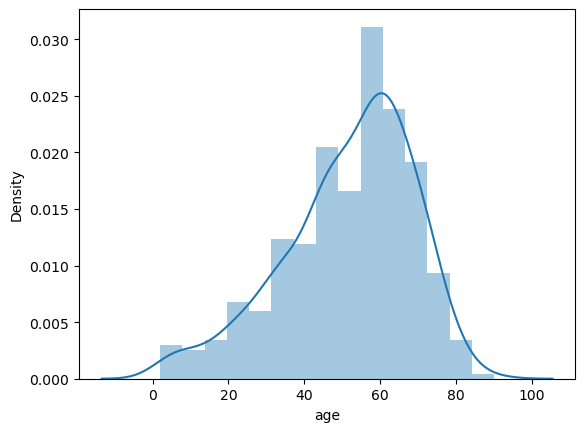

In [28]:
sns.distplot(df['age'])

In [30]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [31]:
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

<BarContainer object of 2 artists>

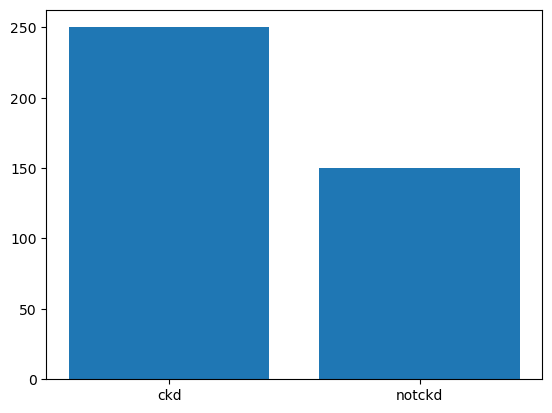

In [32]:
x=df['class'].unique()
y=df['class'].value_counts()
plt.bar(x,y)

In [33]:
# Label Encoding
for i in catcols:
    print("Label Encoding of:",i)
    le= LabelEncoder()
    print(c(df[i]))
    df[i]=le.fit_transform(df[i])
    print(c(df[i]))
    print("*"*100)

Label Encoding of: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
Counter({0: 358, 1: 42})
****************************************************************************************************
Label Encoding of: albumin
Counter({0.0: 245, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, 5.0: 1})
Counter({0: 245, 1: 44, 2: 43, 3: 43, 4: 24, 5: 1})
****************************************************************************************************
Label Encoding of: coronary_artery_disease
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
****************************************************************************************************
Label Encoding of: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
Label Encoding of: hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
***************************************************************************

In [35]:
# Creating Independent and dependent variables
selcols=['red_blood_cell','pus_cell','blood_glucose_random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [36]:
x.head()

,red_blood_cell,pus_cell,blood_glucose_random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
0,1,1,121.000000,36.0,0,0,1,0
1,1,1,148.036517,18.0,0,0,0,0
2,1,1,423.000000,53.0,0,1,1,0
3,1,0,117.000000,56.0,1,1,0,0
4,1,1,106.000000,26.0,0,0,0,0


In [37]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [38]:
names=x.columns
names

Index(['red_blood_cell', 'pus_cell', 'blood_glucose_random', 'blood_urea',
       'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease'],
      dtype='object')

In [39]:
# Scaling - MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [40]:
X_scaled=scale.fit_transform(x)
X_scaled

array([[1.        , 1.        , 0.21153846, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.2693088 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.85683761, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.1965812 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.23290598, ..., 0.        , 0.        ,
        0.        ]])

In [41]:
X=pd.DataFrame(X_scaled, columns=names)

In [42]:
X.head()

,red_blood_cell,pus_cell,blood_glucose_random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
0,1.0,1.0,0.211538,0.088575,0.0,0.0,1.0,0.0
1,1.0,1.0,0.269309,0.042362,0.0,0.0,0.0,0.0
2,1.0,1.0,0.856838,0.132221,0.0,1.0,1.0,0.0
3,1.0,0.0,0.202991,0.139923,1.0,1.0,0.0,0.0
4,1.0,1.0,0.179487,0.062901,0.0,0.0,0.0,0.0


In [44]:
# Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(320, 8)
(320, 1)
(80, 8)
(80, 1)


C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is

Model: Logistic Regression
Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.00      0.00      0.00         0
           2       0.96      0.96      0.96        28

    accuracy                           0.96        80
   macro avg       0.65      0.64      0.65        80
weighted avg       0.97      0.96      0.97        80

Confusion Matrix:


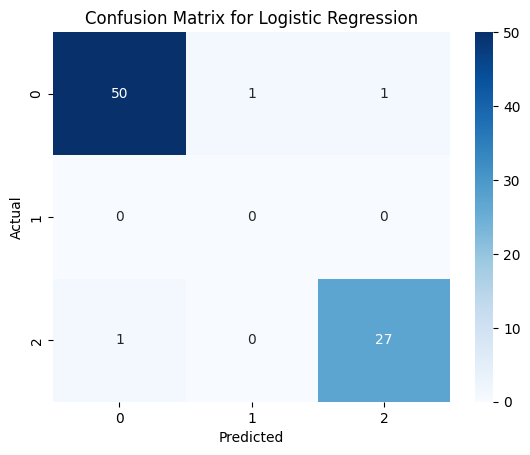

Model: Decision Tree
Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.00      0.00      0.00         0
           2       0.97      1.00      0.98        28

    accuracy                           0.97        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.99      0.97      0.98        80

Confusion Matrix:


C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


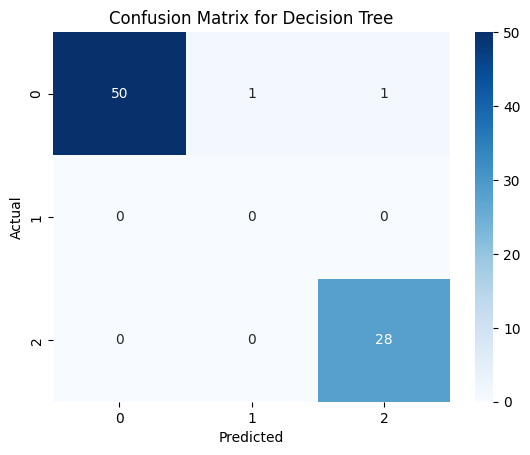

Model: Random Forest
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:


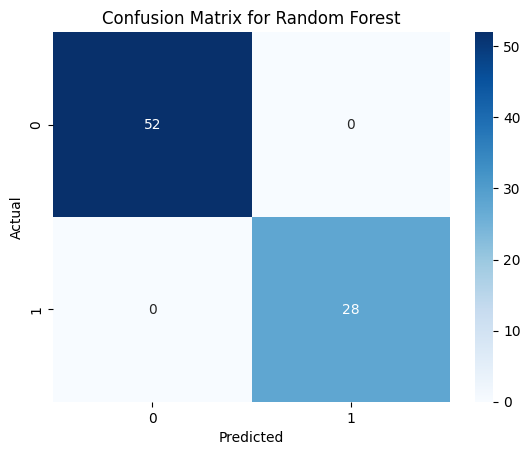

Model: SVM
Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           2       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Confusion Matrix:


C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

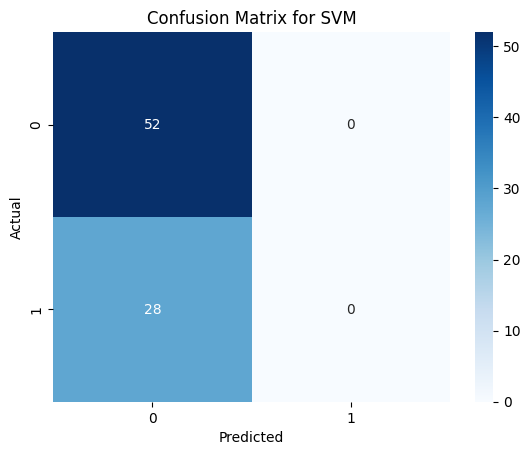

In [35]:
# Initialize the models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier()
svm = SVC()

# Train the models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rforest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rforest = rforest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
predictions = [y_pred_logreg, y_pred_dtree, y_pred_rforest, y_pred_svm]

for model, y_pred in zip(models, predictions):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [36]:
# Compare the models
results = {
    'Model': models,
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_dtree),
                 accuracy_score(y_test, y_pred_rforest),
                 accuracy_score(y_test, y_pred_svm)]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression    0.9625
1        Decision Tree    0.9750
2        Random Forest    1.0000
3                  SVM    0.6500
